# Analise exploratória de dados

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sct
import statsmodels.api as sm

In [2]:
# Configurando a pasta dos recursos e de destino
diretorio_raiz = os.getcwd()
diretorio_raiz = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Adicionando o diretorio raiz no ambiente para possibilitar realizar importações
sys.path.insert(0, diretorio_raiz)

In [3]:
from src.experimentos import Experimentos
from src.utils import Utils

# Instanciando os objetos do projeto
utils = Utils()
experimentos = Experimentos()

In [4]:
# Realizando algumas configuração para o notebook em relação a exibição de linhas e colunas

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sns.set()

In [5]:
diretorio_data = os.path.join(diretorio_raiz, 'data')
diretorio_output = os.path.join(diretorio_raiz, 'output')

print(f'diretorio_raiz: {diretorio_raiz}')
print(f'diretorio_data: {diretorio_data}') 
print(f'diretorio_output: {diretorio_output}')

diretorio_raiz: /home/johnnes/codenation/projeto-pratico
diretorio_data: /home/johnnes/codenation/projeto-pratico/data
diretorio_output: /home/johnnes/codenation/projeto-pratico/output


In [6]:
# Leitura dos dados
market = pd.read_csv(os.path.join(diretorio_data, 'estaticos_market.csv'), index_col=0)

In [7]:
market.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,Fals

In [8]:
market_info = utils.descrever_dataframe(market)
market_info.tipo.value_counts()

float64    144
object      27
bool         9
int64        1
Name: tipo, dtype: int64

In [9]:
market_info.coluna.isin(['qt_ex_funcionarios']).sum()

1

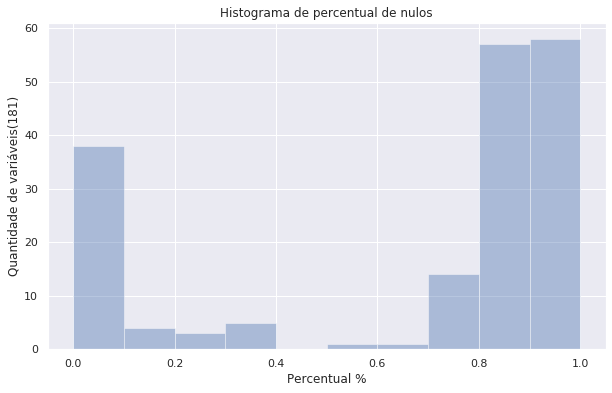

In [10]:
# Exibindo grafico pra observar as concentrações dos percentuais faltantes dos dados
plt.figure(figsize=(10, 6))
plt.title('Histograma de percentual de nulos')
ax = sns.distplot(market_info['porcentagem_nulos'], bins=10, kde=False)

plt.xlabel('Percentual %')
plt.ylabel(f'Quantidade de variáveis({market.shape[1]})')
plt.show()

Ao realizar a visualização dos dados em relação ao percentual faltante, pôde-se observar que a maior parte das variáveis está com 70% ou mais, sendo assim há uma grande ausencia de informações.

## Tratamento de dados faltantes

Iniciarei analisando as variáveis com 100% de nulos para compreender a natureza dessas observações para concluir que ao deletar não estaria perdendo informações relevantes. Posteriomente serão as variáveis com percentual nulo igual ou superior a 70% para ter alguma conclusão sobre o aproveitamente das próprias, posteriormente as demais.

### Investigando variáveis com 100% faltante

Apesar de não conter informações sobre os dados, pois não contém nenhum valor preenchido vou analisa-las para verificar se não contém nenhuma relação com outra ou até mesmo compreender do que se tratam.

In [11]:
# Extraindo os dados com todos os dados considerados faltantes
market_variaveis_faltante = market_info[market_info.porcentagem_nulos >= 1.0].coluna.values
market_faltante = market[market_variaveis_faltante].copy()

market_faltante.dtypes.value_counts()

float64    5
dtype: int64

In [12]:
market_faltante.describe()

,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,grau_instrucao_macro_desconhecido
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [13]:
for variavel in market_variaveis_faltante:
    print(utils.descrever_variavel(variavel))

('qt_alteracao_socio_total', 'integer value, quantity of changes in the QSA')
('qt_alteracao_socio_90d', 'integer value, quantity of changes in the QSA in the last 90 days')
('qt_alteracao_socio_180d', 'integer value, quantity of changes in the QSA in the last 180 days')
('qt_alteracao_socio_365d', 'integer value, quantity of changes in the QSA in the last 365 days')
('grau_instrucao_macro_desconhecido', 'integer value, same as grau_instrucao_desconhecido')


Investigando do que se trata as variáveis `qt_alteracao_socio_total, qt_alteracao_socio_90d, qt_alteracao_socio_180d, qt_alteracao_socio_365d` descobri que se originam de um serviço de Consulta ao Quadro de Sócios e Administradores (QSA) que permite descobrir sócios de uma empresa [Fonte](https://blog.brasilconsultas.com.br/como-descobrir-socios-de-uma-empresa/).

Agora para a variável `grau_instrucao_macro_desconhecido` está descrito que equivale a `grau_instrucao_desconhecido` que nem existe nos dados, portanto, decide-se remover as variaveis com todos os dados faltantes.

In [14]:
# Removendo as colunas que tem 100% de dados faltantes
market.drop(market_variaveis_faltante, axis=1, inplace=True)

### Investigando variáveis inferior à 70% faltante

In [15]:
# Extraindo os dados com todos os dados considerados faltantes
market_variaveis_faltante = market_info[market_info.porcentagem_nulos < 0.7].coluna.values

market_faltante = market[market_variaveis_faltante].copy()

market_info = utils.descrever_dataframe(market_faltante)

market_faltante.dtypes.value_counts()

object     26
float64    16
bool        9
int64       1
dtype: int64

In [16]:
print(f'Variáveis sem ausência de dados: {market_info[market_info.porcentagem_nulos == 0].coluna.values}')

Variáveis sem ausência de dados: ['id' 'fl_matriz' 'de_natureza_juridica' 'sg_uf' 'natureza_juridica_macro'
 'de_ramo' 'idade_empresa_anos' 'idade_emp_cat' 'fl_me' 'fl_sa' 'fl_epp'
 'fl_mei' 'fl_ltda' 'fl_st_especial' 'fl_email' 'fl_telefone' 'fl_rm'
 'qt_filiais']


In [17]:
market_faltante.describe()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
count,462298.000000,460371.000000,460371.000000,417022.000000,318469.000000,347207.000000,347207.000000,347207.000000,310696.000000,310696.000000,310696.000000,307381.000000,195115.000000,145029.000000,4.347850e+05,4.347850e+05,462298.000000
mean,9.948677,3.591801,48.699177,25.007247,1308.005725,1.496326,1.476681,0.019645,42.816452,44.344131,41.355225,1.396082,1.353925,1.107117,8.020911e+05,3.367205e+08,28.737044
std,9.615664,72.600352,1206.696804,9.679799,1161.889222,3.276626,3.258079,0.195166,12.626447,13.930385,12.514921,2.578793,2.848980,0.840194,3.099979e+07,7.114614e+09,468.626094
min,0.016438,0.000000,0.000000,0.000000,100.000000,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,1.000000,1.000000,1.000000,0.000000e+00,4.104703e+04,0.000000
25%,2.756164,0.000000,0.000000,22.000000,673.230000,1.000000,1.000000,0.000000,33.000000,34.000000,32.000000,1.000000,1.000000,1.000000,1.648512e+05,1.854576e+05,0.000000
50%,6.704110,0.000000,0.000000,23.000000,946.680000,1.000000,1.000000,0.000000,42.000000,43.000000,40.000000,1.000000,1.000000,1.000000,2.100000e+05,2.100000e+05,0.000000
75%,14.465753,0.000000,0.000000,25.000000,1518.080000,2.000000,2.000000,0.000000,51.000000,54.000000,50.000000,1.000000,1.000000,1.000000,2.100000e+05,2.100000e+05,0.000000
max,106.432877,9782.000000,122090.000000,66.000000,75093.840000,246.000000,246.000000,13.000000,127.000000,127.000000,127.000000,179.000000,84.000000,140.000000,1.454662e+10,2.227618e+11,9647.000000


Realizando uma investigação preliminar nos dados observei que as variáveis `idade_media_socios`,  `idade_maxima_socios`,  `idade_minima_socios` estão com anomalias, chego a essa conclusão que para ambas a **idade minima é de -2 e máxima de 127 anos.**

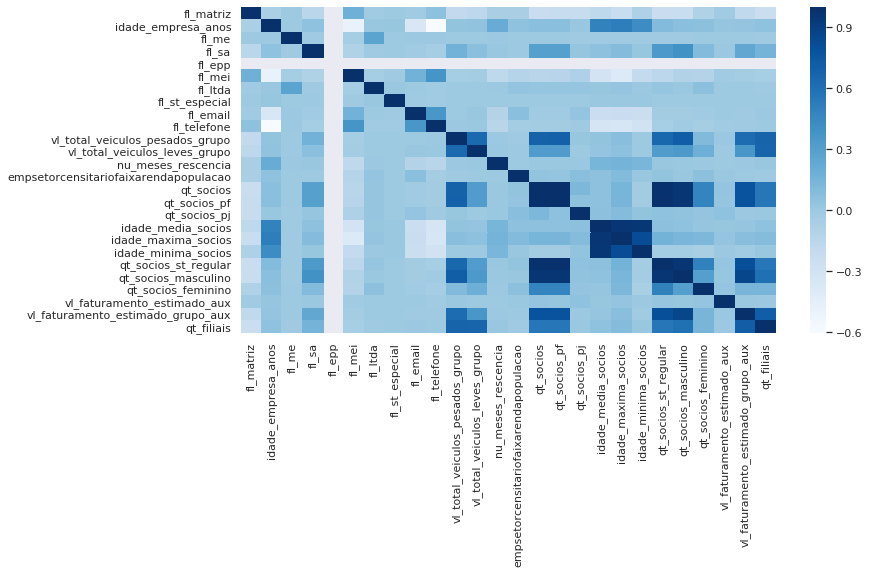

In [18]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(market_faltante.corr(), cmap='Blues')

plt.show()

Analisando a correção para as variáveis de observou que `idade_empresa_anos	` tem a maior correção com as variáveis de idades de sócios.

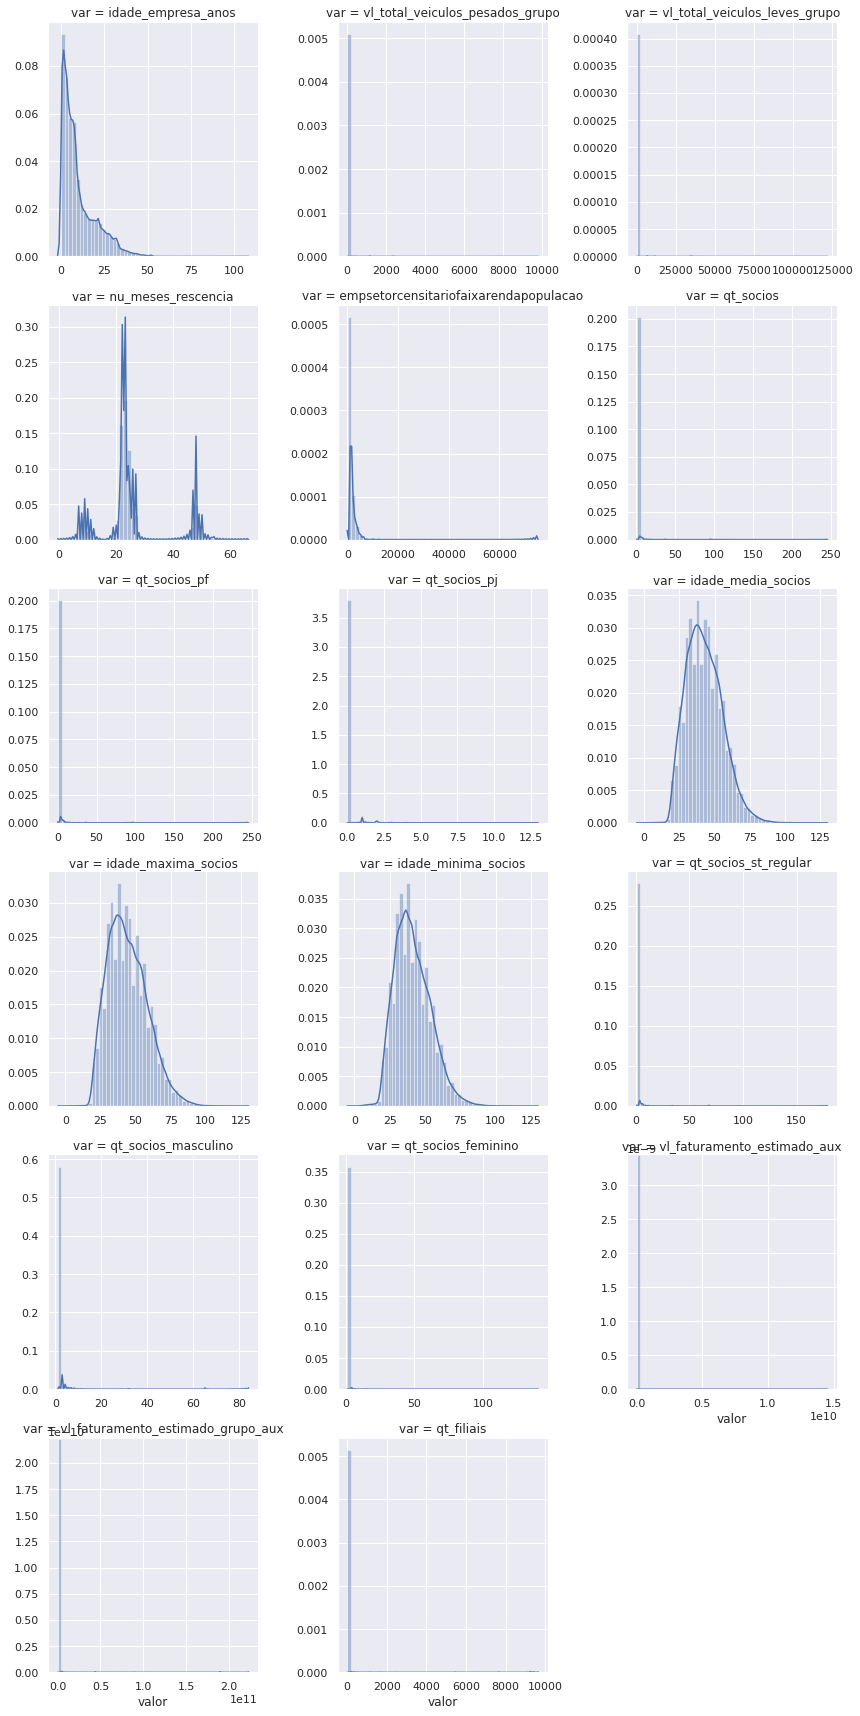

In [23]:
# Exibir histograma de todas variaveis numericas
experimentos.criar_histogramas(market_faltante, 
                               market_info[(market_info.tipo == 'float64') | (market_info.tipo == 'int')].coluna.values,
                              col_wrap=3)
plt.show()

Aparentemente a `idade_empresa_anos` é uma [power law](https://en.wikipedia.org/wiki/Power_law) que representa relacionamento entre duas quantidades, que faz sentido pois a variável está escalada em anos que faz correspondencia com os dias. Uma maneira de fazer o tratamanto da distribuição é realizando a transformação em log. [google-machine-learning/clustering/prepare-data](https://developers.google.com/machine-learning/clustering/prepare-data) mas podemos também verificar a distribuição representada em dias.


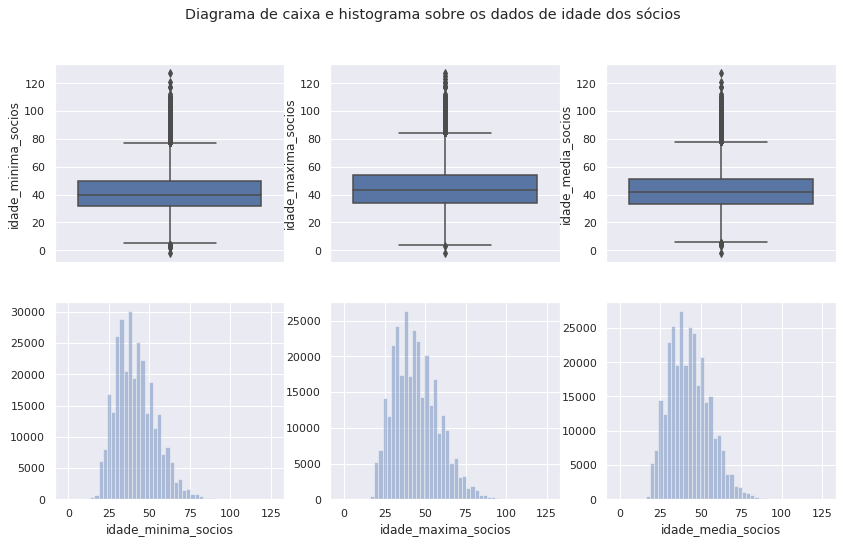

In [20]:
# Definindo as varáveis para analise
market_variaveis_analise = ['idade_minima_socios', 'idade_maxima_socios', 'idade_media_socios']

plt.figure(figsize=(14, 8))
plt.suptitle('Diagrama de caixa e histograma sobre os dados de idade dos sócios')

for variavel in range(len(market_variaveis_analise)):
    plt.subplot(2, 3, variavel+1)
    ax_box = sns.boxplot(market_faltante[market_variaveis_analise[variavel]].dropna(axis=0), orient='v')
    
    plt.subplot(2, 3, variavel+4)
    ax_hist = sns.distplot(market_faltante[market_variaveis_analise[variavel]].dropna(axis=0), kde=False)

plt.show()

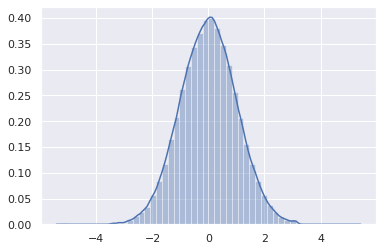

In [21]:
from sklearn.preprocessing import QuantileTransformer

qt_transformer = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=0)

ax = sns.distplot(qt_transformer.fit_transform(market_faltante[['idade_empresa_anos']]))

In [31]:
experimentos.verificar_distribuicao_normal(qt_transformer.fit_transform(market_faltante[['idade_empresa_anos']])[:,0])

(0.05689627843430922, True)

In [24]:
experimentos.verificar_distribuicao_normal(market_faltante['idade_minima_socios'].dropna())

(0.0, False)

In [ ]:
sm.qqplot(market_faltante['idade_minima_socios'].dropna(), fit=True, line="45")

plt.xlabel('Quartis teóricos')
plt.ylabel('Quartis da amostra')
plt.suptitle('QQplot das observações de idade_minima_socios')
plt.show()

In [ ]:
# Tratamento de anonalias
outliers = experimentos.deteccao_anomalia(market_faltante['idade_minima_socios'])
market_faltante.loc[outliers[2], 'idade_minima_socios'] = np.nan


outliers = experimentos.deteccao_anomalia(market_faltante['idade_maxima_socios'])
market_faltante.loc[outliers[2], 'idade_maxima_socios'] = np.nan

market_faltante[market_variaveis_analise].head()

### Investigando variáveis igual ou superior à 70% faltante

In [ ]:
# Extraindo os dados com todos os dados considerados faltantes
market_variaveis_faltante = market_info[(market_info.porcentagem_nulos >= 0.7) 
                                        & (market_info.porcentagem_nulos < 1.0)].coluna.values

market_faltante = market[market_variaveis_faltante].copy()

market_faltante.dtypes.value_counts()

In [ ]:
market_faltante.describe()

As variáveis `qt_coligados_nula`, `qt_coligados_atividade_inativo`, `qt_coligados_atividade_alto`, `qt_coligados_atividade_medio`, `qt_coligados_atividade_baixo`, `qt_coligados_atividade_mt_baixo`, `qt_coligados_atividade_inativo` estão com minimo e máximo zerado, pode ser variáveis que podem ser removidas.

In [ ]:
variaveis_faltantes_observar = ['qt_coligados_nula', 'qt_coligados_atividade_inativo', 
                                'qt_coligados_atividade_alto', 'qt_coligados_atividade_medio', 
                                'qt_coligados_atividade_baixo','qt_coligados_atividade_mt_baixo', 
                                'qt_coligados_atividade_inativo']

for variavel in variaveis_faltantes_observar:
    print(utils.descrever_variavel(variavel))

Analisando os dados descritos do pandas observei que as variáveis `qt_coligados_nula` está ligado a agência tributaria americana [Fonte](https://pt.wikipedia.org/wiki/Internal_Revenue_Service) e outras trata-se e conexão com outras empresas de acordo com a classificação de frequência.

In [ ]:
# Removendo as colunas observadas que não possuem variação

market.drop(variaveis_faltantes_observar, axis=1, inplace=True)
market_faltante.drop(variaveis_faltantes_observar, axis=1, inplace=True)

market_faltante.shape

In [ ]:
for variavel in market_faltante.columns.values:
    print(utils.descrever_variavel(variavel))

In [ ]:
variaveis_faltantes_observar = ['idade_ate_18', 'idade_de_19_a_23', 'idade_de_24_a_28', 'idade_de_29_a_33', 
                                'idade_de_34_a_38', 'idade_de_39_a_43', 'idade_de_44_a_48', 'idade_de_49_a_53', 
                                'idade_de_54_a_58', 'idade_acima_de_58', 'qt_funcionarios', 'total']

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(market_faltante[variaveis_faltantes_observar].fillna(0).corr(), cmap='Blues', annot=True)

In [ ]:
market_info[market_info.coluna.isin(variaveis_faltantes_observar)]